<a href="https://colab.research.google.com/github/yash-rai22/Marketing-Campaign-for-Banking-Products/blob/master/MLproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#IMPORT DATASETS AND LIBRARIES
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_excel("Bank_Personal_Loan_Modelling.xlsx")

In [3]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
df.columns = ["ID","Age","Experience","Income","ZIPCode","Family","CCAvg","Education","Mortgage","PersonalLoan","SecuritiesAccount","CDAccount","Online","CreditCard"]
df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
#SIZE OF THE DATASET (ROW,COLUMNS)
df.shape

(5000, 14)

In [6]:
df[['Family','Education','PersonalLoan','SecuritiesAccount','CDAccount','Online','CreditCard']]=df[['Family','Education','PersonalLoan','SecuritiesAccount','CDAccount','Online','CreditCard']].astype('int')

In [7]:
#DATATYPES OF EACH COLUMN OF THE DATASET
df.dtypes

ID                     int64
Age                    int64
Experience             int64
Income                 int64
ZIPCode                int64
Family                 int64
CCAvg                float64
Education              int64
Mortgage               int64
PersonalLoan           int64
SecuritiesAccount      int64
CDAccount              int64
Online                 int64
CreditCard             int64
dtype: object

In [12]:
#STATISTICAL SUMMARY OF THE DATASET
df.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.134600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.415189,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [9]:
#AS WE CAN SEE ABOVE THAT THE MINIMUM EXPERIENCE LEVEL IS -3, WHICH SHOULD BE REMOVED AS EXPERIENCE CANNOT BE NEGATIVE.
neg = df.Experience < 0
neg.value_counts()

False    4948
True       52
Name: Experience, dtype: int64

In [10]:
#THERE ARE 52 NEGATIVE VALUES, WHICH IS AN ERROR.
#THEREFORE REPLACING THESE VALUES BY ABSOLUTE VALUE.

df['Experience'] = abs(df['Experience'])

In [11]:
df['Experience'].describe()

count    5000.000000
mean       20.134600
std        11.415189
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

In [13]:
#THERE ARE NO NULL VALUES PRESENT IN THE DATASET
df.isnull().values.any()

False

In [14]:
#NUMBER OF UNIQUES IN EACH COLUMN
for col in df:
    print(col,':',df[col].nunique())

ID : 5000
Age : 45
Experience : 44
Income : 162
ZIPCode : 467
Family : 4
CCAvg : 108
Education : 3
Mortgage : 347
PersonalLoan : 2
SecuritiesAccount : 2
CDAccount : 2
Online : 2
CreditCard : 2


In [15]:
# DROPPING THE ID COLUMN AS IT DOESN'T CONTRIBUTE ANYTHING TO OUR DATA ANALYSIS
df.drop(['ID'],inplace=True,axis=1)
df

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [16]:
#NMUBER OF PEOPLE WITH 0 MORTGAGE
count = 0
for i in df['Mortgage']:
  if i == 0:
      count += 1

print(count)

3462


In [17]:
df['Mortgage'].isin([0]).sum()

3462

In [18]:
df['CCAvg'].isin([0]).sum()

106

In [19]:
# Value counts of all categorical columns.
print(df.Online.value_counts())
print(df.PersonalLoan.value_counts())
print(df.SecuritiesAccount.value_counts())
print(df.CDAccount.value_counts())
print(df.CreditCard.value_counts())
print(df.Family.value_counts())
print(df.Education.value_counts())

1    2984
0    2016
Name: Online, dtype: int64
0    4520
1     480
Name: PersonalLoan, dtype: int64
0    4478
1     522
Name: SecuritiesAccount, dtype: int64
0    4698
1     302
Name: CDAccount, dtype: int64
0    3530
1    1470
Name: CreditCard, dtype: int64
1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
1    2096
3    1501
2    1403
Name: Education, dtype: int64


In [20]:
# UNIVARIATE AND BIVARIATE ANALYSIS.
# THIS SHOWS THE CORELATION BETWEEN EACH AND EVERY COLUMN PAIR OF THE DATASET, SOME OF THE ARE USEFUL.
# EXAMPLE INCOME AND EDUCATION HAVE A LINEAR RELATIONSHIP.
sns.pairplot(df.iloc[:,1:])

KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7fb7de1a2ea0> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
sns.pairplot(df.iloc[:,1:],hue ='PersonalLoan')

In [ ]:
# Income and CCAvg is moderately correlated.
# Age and Experience is highly correlated
# Also there is a moderate correlation b/w Income and Loan.
corr=df.corr()
plt.subplots(figsize =(15, 10)) 
sns.heatmap(corr,annot=True)

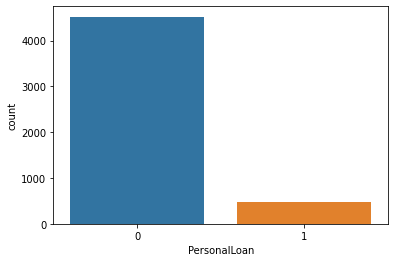

In [ ]:
# SHOW COUNT OF PEOPLE WHO HAVE TAKEN A LOAN and WHO HAVEN't
sns.countplot(x='PersonalLoan',data=df)

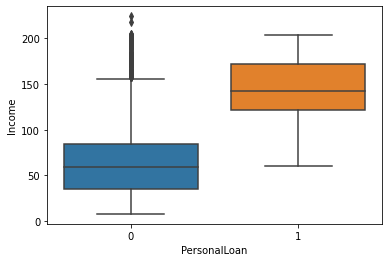

In [ ]:
sns.boxplot(x='PersonalLoan',y='Income',data=df)

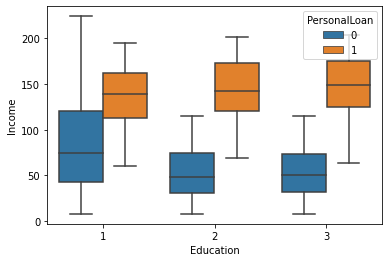

In [ ]:
# NO SPECIFIC CORRELATION BETWEEN AGE AND PERSONAL LOAN, AS ALL AGE GROUPS HAVE PEOPLE WHO HAVE TAKEN LOAN AND WHO HAVE NOT TAKEN LOAN.

#PEOPLE WHO HAVE TAKEN LOANS BELONG TO A PARTICULAR INCOME LEVEL.
sns.boxplot(x='Education',y='Income',hue='PersonalLoan',data=df)

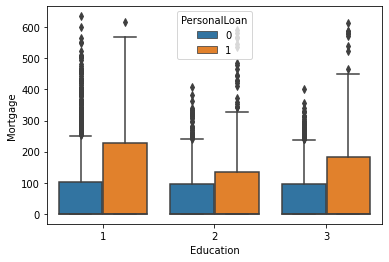

In [ ]:
#  customer who do not have personal loan and customer who has personal loan have high mortgage
sns.boxplot(x="Education", y='Mortgage', hue="PersonalLoan",data = df)

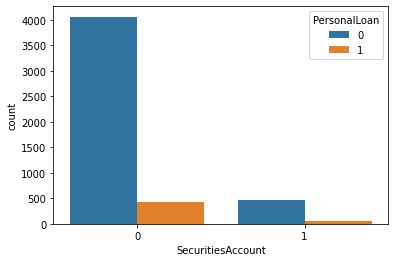

In [ ]:
# CUSTOMERS WHO DON'T TAKE LOANS, HAVE SECURITY ACCOUNT
sns.countplot(x='SecuritiesAccount',hue='PersonalLoan',data=df)

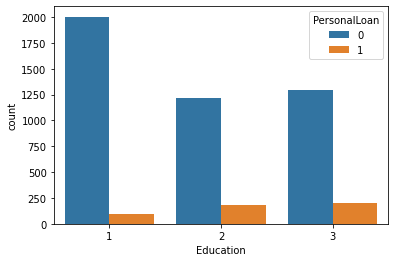

In [ ]:
# MAJORITY OF CUSTOMERS WITH EDUCATION LEVEL 1 DON'T TAKE LOANS
sns.countplot(x='Education',hue='PersonalLoan',data=df)


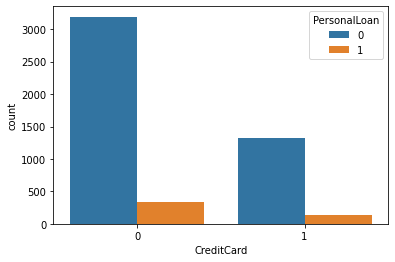

In [ ]:
# CUSTOMERS WITH NO CREDIT CARDS ARE LESS LIKELY TO TAKE LOANS.
sns.countplot(x='CreditCard',hue='PersonalLoan',data=df)

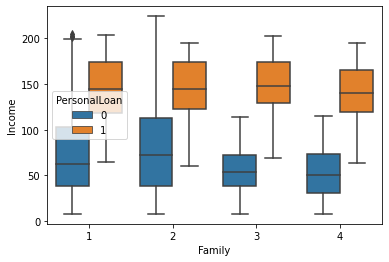

In [ ]:
#FAMILIES WITH HIGHER INCOME ARE MORE LIKELY TO TAKE LOANS.
sns.boxplot(x='Family',y='Income',hue='PersonalLoan',data=df)

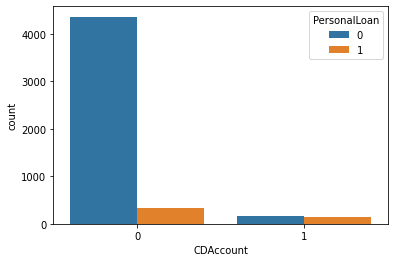

In [ ]:
# Customers with a CDAccount tend to take more loans.
sns.countplot(x='CDAccount',hue='PersonalLoan',data=df)

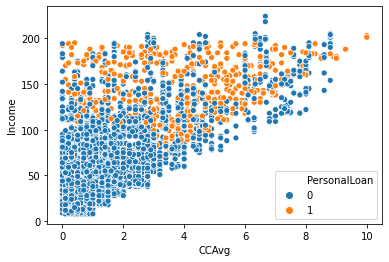

In [ ]:
# With the increase in income, ccavg also increases, and people tend to take more loans.
sns.scatterplot(x='CCAvg',y='Income',hue = 'PersonalLoan',data = df)

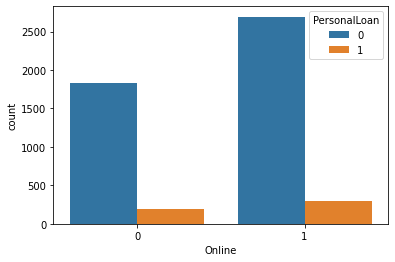

In [ ]:
# NO CORRELATION BETWEEN A CUSTOMER USING INTERNET BANKING FACILITIES AND TAKING A PERSONAL LOAN.
sns.countplot(x='Online',hue='PersonalLoan',data=df)

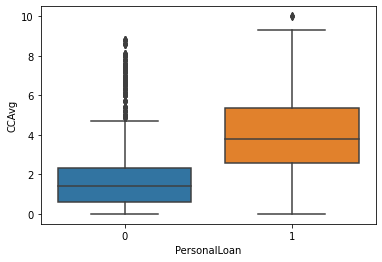

In [ ]:
sns.boxplot(x='PersonalLoan',y='CCAvg',data=df)

In [21]:
y=df['PersonalLoan']
x=df.drop(['PersonalLoan'],axis=1)
x = preprocessing.normalize(x)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [22]:
from sklearn.linear_model import LogisticRegression
lrmodel = LogisticRegression()
lrmodel.fit(x_train,y_train)
y_pred = lrmodel.predict(x_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [29]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred, normalize=True)
print(" TESTING Accuracy :",int(score*100),end='%')

 TESTING Accuracy : 89%

In [30]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_train,lrmodel.predict(x_train), normalize=True)
print(" TRAINING Accuracy :",int(score*100),end='%')

 TRAINING Accuracy : 90%